In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook

In [51]:
COLS = ['time','src','dst','seqno','code','opt1','opt2']
def parse_filename(fn):
    f = open(fn).read().split('\n')
    records = []
    for i, line in enumerate(f):
        if not line: continue
        tmp = line.split(' ')
        time, elements = tmp[0],tmp[1]
        elements = elements.split(',')
        elements = [time] + elements
        if elements[1] == '': continue
        records.append(dict(zip(COLS, elements)))
    d = pd.DataFrame.from_records(records).fillna(0)#.dropna(how='all').fillna(0)
    d.loc[d['code'] == '','code'] = 0
    d.loc[d['opt1'] == '','opt1'] = 0
    d['code'] = d['code'].astype(int)
    d['opt1'] = d['opt1'].astype(int)
    d['opt2'] = d['opt2'].astype(int)
    d['time'] = pd.to_datetime(d['time'])
    return d

def parse_filename_serp(fn):
    d = parse_filename(fn)
    d['RS'] = 0
    d['MeshInfo'] = 0
    d['MeshAnnounce'] = 0
    d.loc[(d['code'] == 0) & (d['opt1'] == 1) & (d['opt2'] == 0), 'RS'] = 1
    d.loc[(d['code'] == 0) & (d['opt1'] == 1) & (d['opt2'] == 6), 'MeshInfo'] = 1
    d.loc[(d['code'] == 0) & (d['opt1'] == 8), 'MeshAnnounce'] = 1
    return d

def parse_filename_rpl(fn):
    d = parse_filename(fn)
    d['DIS'] = 0
    d['DIO'] = 0
    d['DAO'] = 0
    d.loc[(d['code'] == 0), 'DIS'] = 1
    d.loc[(d['code'] == 1), 'DIO'] = 1
    d.loc[(d['code'] == 2), 'DAO'] = 1
    return d

def plot_rpl(filename, resample='1s'):
    d = parse_filename_rpl(filename)

    pf = d[['time','src','seqno','DIS','DIO','DAO']]
    pf = pf.set_index('time')
    pf_pkt = pf.drop_duplicates(subset=['src','seqno'])

    f1 = pf.resample(resample,how='sum').fillna(0).plot(style={'DIS':'b--+','DIO':'g--+','DAO':'r--+'}, figsize=(15,8))
    f2 = pf_pkt.resample(resample,how='sum').fillna(0).plot(style='-o', ax=f1)
    f1.set_ylabel('Packets Sent')

def plot_serp(filename, resample='1s'):
    d = parse_filename_serp(filename)
    pf = d[['time','src','seqno','RS','MeshInfo','MeshAnnounce']]
    pf = pf.set_index('time')
    pf_pkt = pf.drop_duplicates(subset=['src','seqno'])
    
    f1 = pf.resample(resample,how='sum').fillna(0).plot(style={'RS':'b--+','MeshInfo':'g--+','MeshAnnounce':'r--+'}, figsize=(15,8))
    f2 = pf_pkt.resample(resample,how='sum').fillna(0).plot(style='-o',ax=f1)

    f1.set_ylabel('Packets Sent')

<IPython.core.display.Javascript object>


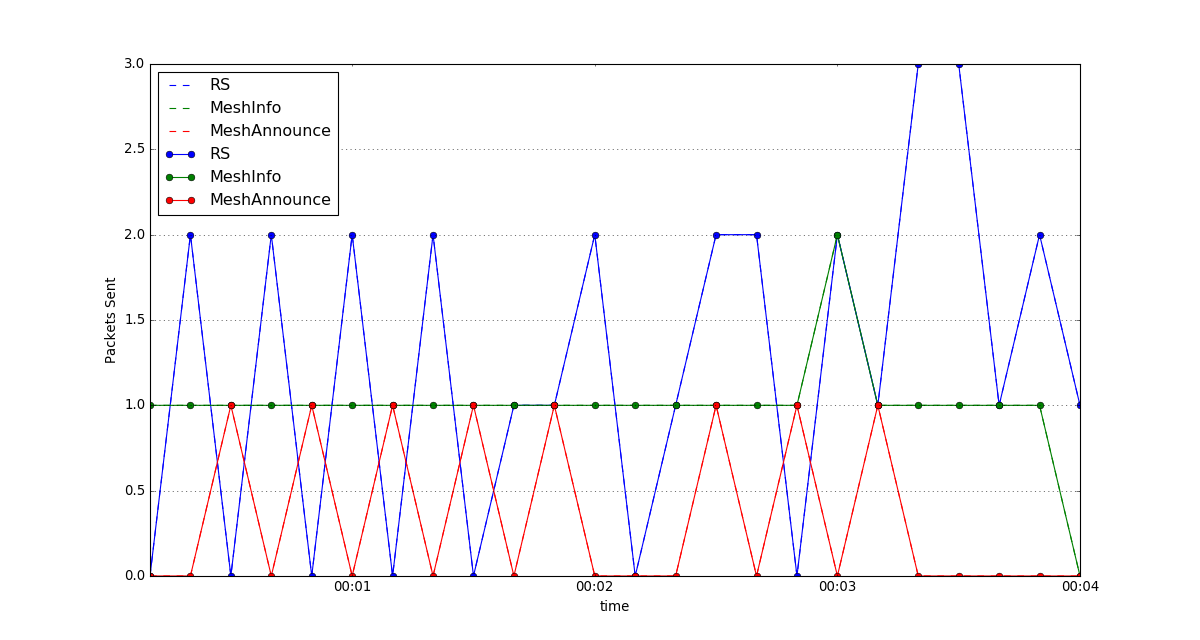

In [52]:
a = plot_serp('SERP-1hop-10nodes-incremental-notraffic-run1.csv', '10s')

<IPython.core.display.Javascript object>


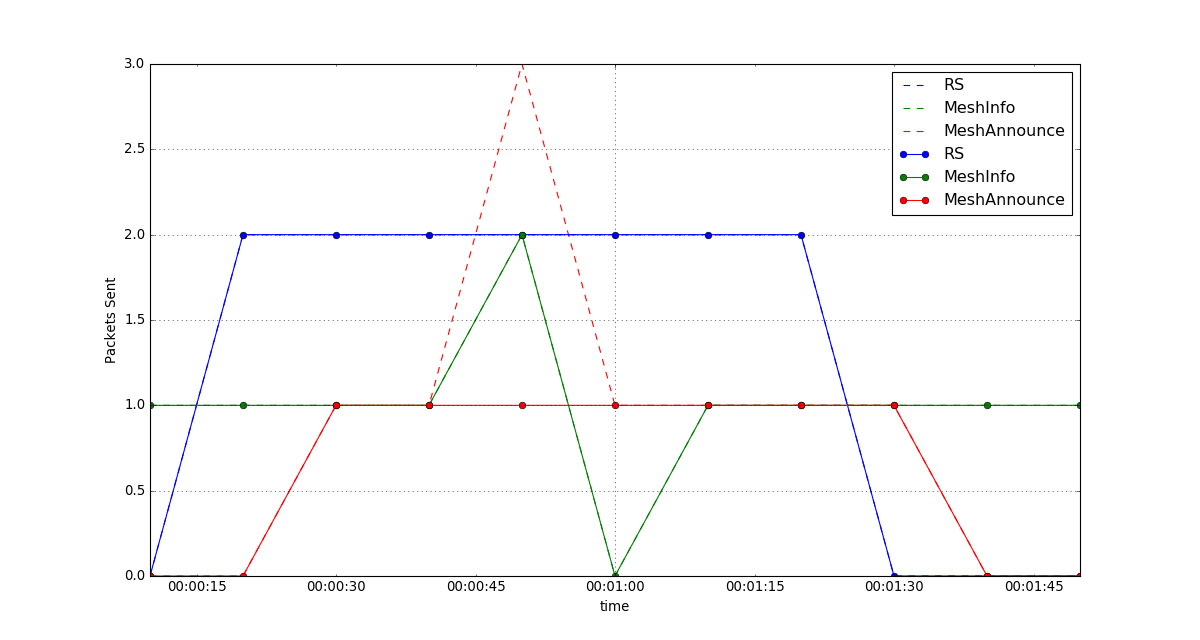

In [53]:
plot_serp('SERP-1hop-7nodes-incremental-notraffic-run1.csv', '10s')

<IPython.core.display.Javascript object>


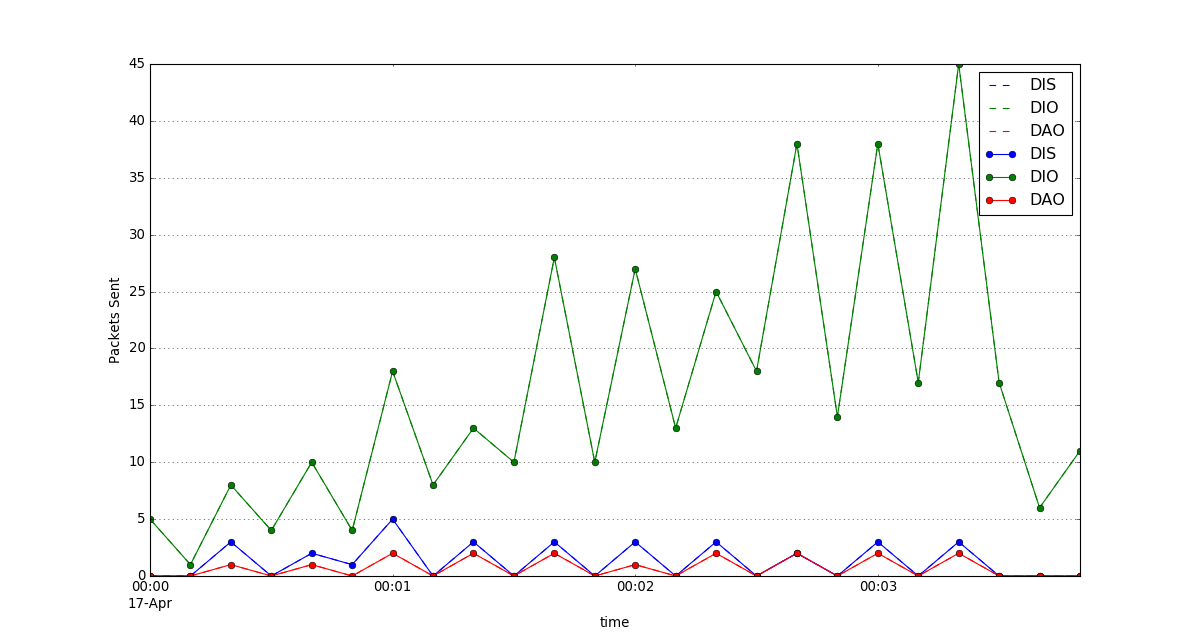

In [54]:
plot_rpl('RPL-1hop-10nodes-incremental-notraffic-run1.csv', '10s')

<IPython.core.display.Javascript object>


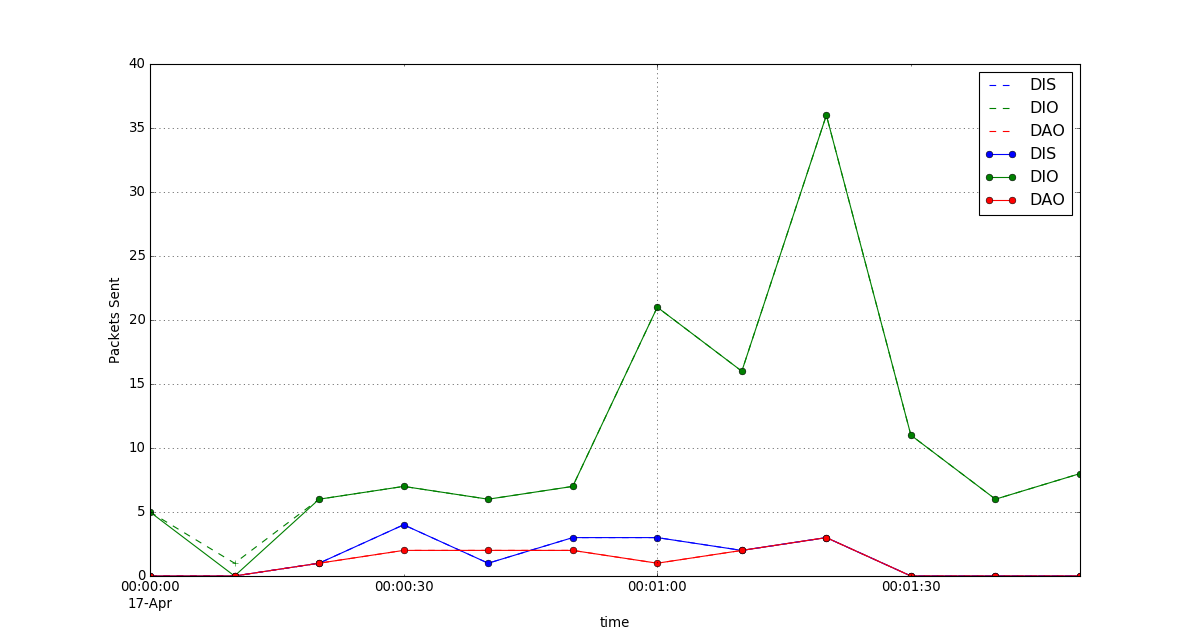

In [55]:
plot_rpl('RPL-1hop-7nodes-incremental-notraffic-run1.csv', '10s')